### Transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
df= pd.DataFrame(iris)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
Species = df.species.unique()
Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
x = df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']].values
y = df.loc[:,['species']].values

In [37]:
# dimensionality reduction

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp= pca.fit_transform(x)
principal_df = pd.DataFrame(data = princ_comp, columns = ['principal_comp_1', 'principal_comp_2', 'principal_comp_3'])
principal_comp
principal_df

,principal_comp_1,principal_comp_2,principal_comp_3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [38]:
finalDf = pd.concat([principal_df, df[['species']]], axis = 1)
finalDf


,principal_comp_1,principal_comp_2,principal_comp_3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


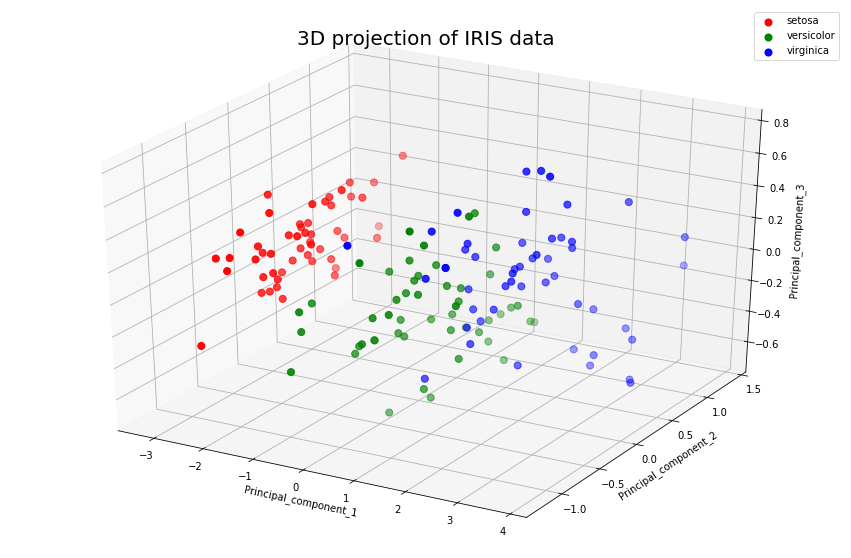

In [74]:
# create figure
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,projection = '3d')
ax.set_xlabel('Principal_component_1')
ax.set_ylabel('Principal_component_2')
ax.set_zlabel('Principal_component_3')
ax.set_title('3D projection of IRIS data',fontsize = 20)

from mpl_toolkits.mplot3d import Axes3D

colors = ['r', 'g', 'b']
for target, color in zip(Species,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_comp_1']
              , finalDf.loc[indicesToKeep, 'principal_comp_2']
              , finalDf.loc[indicesToKeep, 'principal_comp_3']
              , c= color
              , s=50
              )
ax.legend(Species)
ax.grid()
plt.show()